# Data Visualization

# Univariate Visualizations

## Target

In [3]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load data
path = 'all_grades_data_cleaned.csv'
df = pd.read_csv(path, index_col = 0)

In [5]:
# inspect
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49012 entries, 12 to 64185
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   section_type       49012 non-null  object 
 1   instructor_id      49012 non-null  object 
 2   facility_code      45521 non-null  object 
 3   start_time         49012 non-null  float64
 4   mon                49012 non-null  bool   
 5   tues               49012 non-null  bool   
 6   wed                49012 non-null  bool   
 7   thurs              49012 non-null  bool   
 8   fri                49012 non-null  bool   
 9   subject_name       49012 non-null  object 
 10  course_name        49012 non-null  object 
 11  a_proportion       49012 non-null  float64
 12  f_proportion       49012 non-null  float64
 13  avg_grade          49012 non-null  float64
 14  year               49012 non-null  int64  
 15  term               49012 non-null  object 
 16  class_length       49

,section_type,instructor_id,facility_code,start_time,mon,tues,wed,thurs,fri,subject_name,course_name,a_proportion,f_proportion,avg_grade,year,term,class_length,total_time,weekend,course_difficulty
31866,lec,other,0407,595.0,True,False,True,False,True,chemical and biological engineering,chemical process thermodynamics,0.140351,0.017544,2.710526,11,spring,50.0,150,False,intermediate
29419,lec,332957.0,0545,660.0,False,True,False,True,False,communication arts,other,0.190476,0.047619,2.928571,7,spring,75.0,150,False,intermediate
50937,lec,other,0018,930.0,False,False,False,True,False,english,creative writing: fiction workshop,0.538462,0.000000,3.730769,17,fall,115.0,115,False,intermediate
20423,lec,2601715.0,0482,660.0,False,True,False,True,False,spanish (spanish and portuguese),introduction to hispanic literatures,0.363636,0.000000,3.204545,7,fall,75.0,150,False,elementary
52634,lec,other,0031,595.0,True,False,True,False,False,kinesiology,motor learning and performance,0.406250,0.000000,3.476562,18,fall,50.0,100,False,intermediate
4652,lec,4435787.0,0056,800.0,False,True,False,True,False,sociology,topics in sociology,0.923077,0.000000,3.923077,13,fall,115.0,230,False,intermediate
50412,lec,other,0140,1020.0,False,False,False,True,False,rehabilitation psychology and special education,other,0.458333,0.000000,3.625000,8,spring,150.0,150,False,intermediate
23112,lec,other,0470,660.0,False,True,False,True,False,psychology,other,0.800000,0.000000,3.880000,8,fall,75.0,150,False,advanced
52604,lec,other,0080,595.0,True,False,True,False,False,biological systems engineering,other,0.083333,0.000000,2.854167,12,fall,50.0,100,False,intermediate
45576,lec,other,0140,960.0,True,False,True,False,False,marketing,other,0.333333,0.000000,3.388889,15,spring,75.0,150,False,intermediate


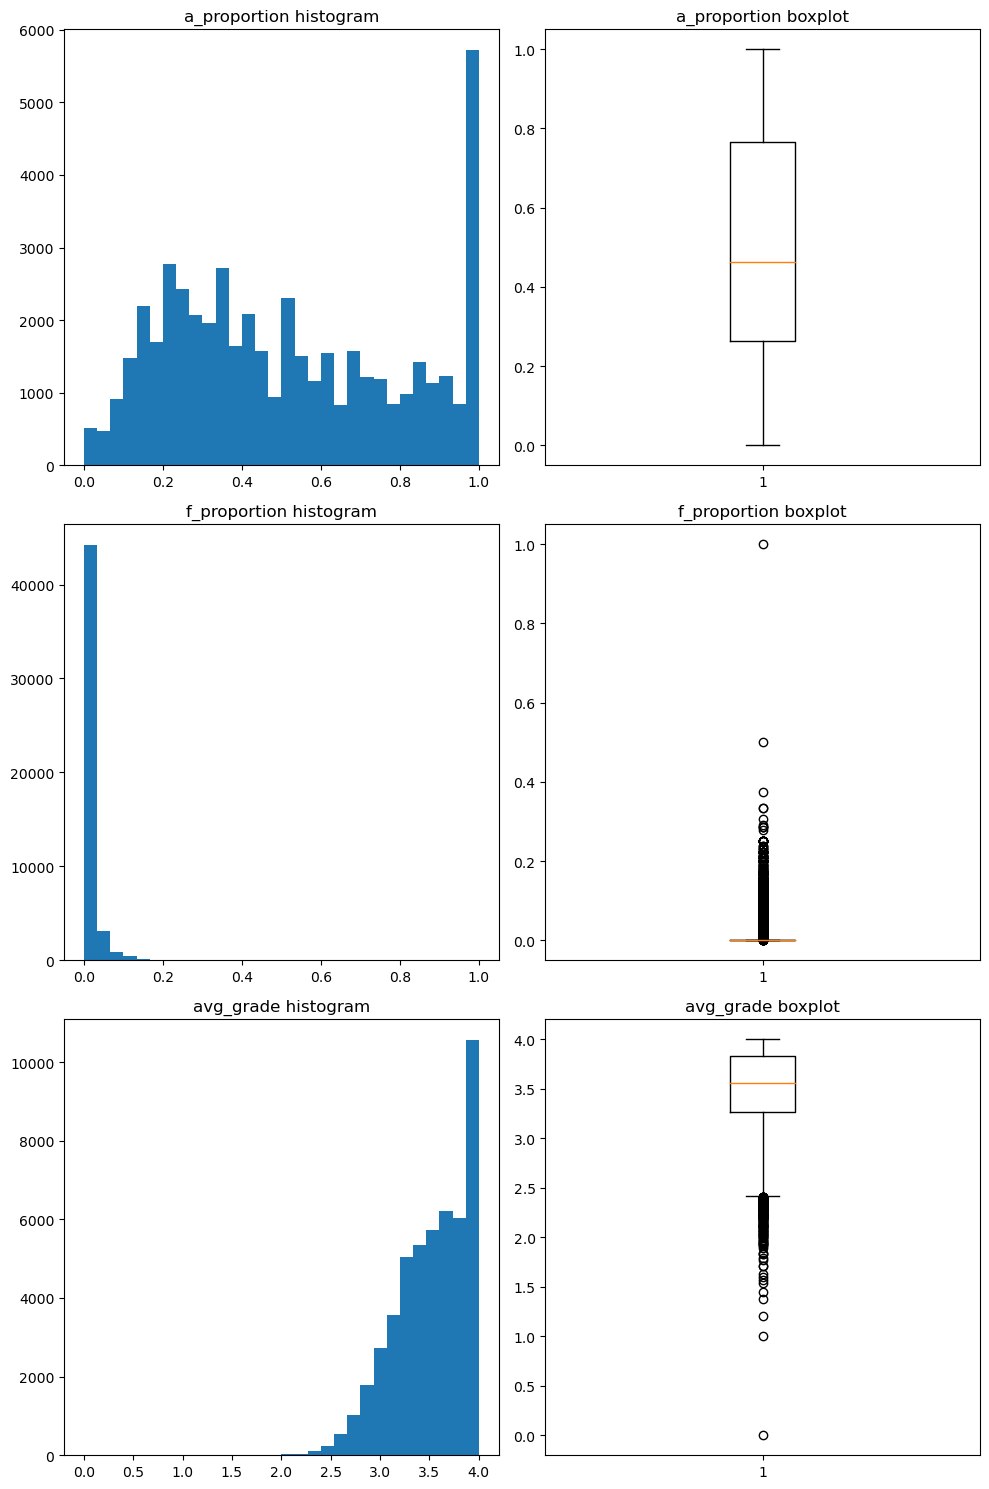

In [6]:
# three target variables: 'a_proportion', 'f_proportion', 'avg_grade'
# histograms and boxplots

targets = ['a_proportion', 'f_proportion', 'avg_grade']
targets_df = df[['a_proportion', 'f_proportion', 'avg_grade']]

fig, axes = plt.subplots(nrows = len(targets), ncols = 2, figsize = (10, 15))

for i, col in enumerate(targets_df):
#     print(f"i: {i}")
#     print(f"col: {col}")

    axes[i][0].hist(df[col], bins = 30)
    axes[i][0].set_title(f"{col} histogram")
    
    axes[i][1].boxplot(df[col])
    axes[i][1].set_title(f"{col} boxplot")

plt.tight_layout()

There is a very interesting distribution of As and Fs. The number of courses that have an a_proportion of 1, meaning that all students who received a letter grade in that section received an A, is extremely high. This tells me that it may be difficult to predict it, since there may not be enough variation in the distribution to predict. It would be interesting to see if taking out the As would result in predicting more of the grade variation between B and F.

The a_proportion boxplot shows us that most of the sections are centered around a median close to 0.5, meaning that out of all letter grades awarded, about have were As.

The f_distribution shows what we would expect with the a_proportion, that since there are a lot of sections with an a_proportion of 1, there are equally as many sections with an f_proportion of 0. Again, taking Fs out to see if we can predict the remaining grade variation better would be interesting.

The f_proportion boxplot shows us that by far most courses did not have any meaningful percentage of Fs, and the outlier course with the highest proportion of Fs had about 10% of the section awarded an F grade.

The avg_grade, which is on a 4.0 grade-point scale, is skewed toward 4.0 with the number of sections with all As. It tapers down more or less until about a 2.25, after which there are not enough courses in those bins to see on the plot. A 2.0 is a C, which in my experience is the grade requirement to receive credit for a course (for a variety of reasons, such as it being a course in a major/minor). Although a D grade usually gives credit, there are many grade requirements that require a C. Given this information, it is interesting to see that a vast majority of courses have an average grade of above a 2.0, and definitely above a 1.0, meaning that the majority of students usually pass a course.

The average grade boxplot shows us that most sections had a very high average grade, and only 20% of courses had an average grade of below about 2.5. There are several outlier sections with lower average grades, and one outlier section with an average grade of 0.0, which is an F.

## Outliers

In [7]:
df[df['avg_grade'] == 0]

,section_type,instructor_id,facility_code,start_time,mon,tues,wed,thurs,fri,subject_name,course_name,a_proportion,f_proportion,avg_grade,year,term,class_length,total_time,weekend,course_difficulty
39484,lab,2601912.0,0028,560.0,False,False,False,False,True,physical educ activity progm,adapted fitness&pers traing,0.0,1.0,0.0,8,fall,100.0,100,False,elementary


This is a very interesting case, but without more information suggesting it is not valid, I will keep it in the dataset for now.

## Features

In [8]:
### Categorical Features

In [9]:
# look at all the features' dtypes
df.dtypes

section_type          object
instructor_id         object
facility_code         object
start_time           float64
mon                     bool
tues                    bool
wed                     bool
thurs                   bool
fri                     bool
subject_name          object
course_name           object
a_proportion         float64
f_proportion         float64
avg_grade            float64
year                   int64
term                  object
class_length         float64
total_time             int64
weekend                 bool
course_difficulty     object
dtype: object

In [10]:
# select all categorical columns for visualization
# cat_cols = [col for col in df.columns if df[col].dtype == 'object']

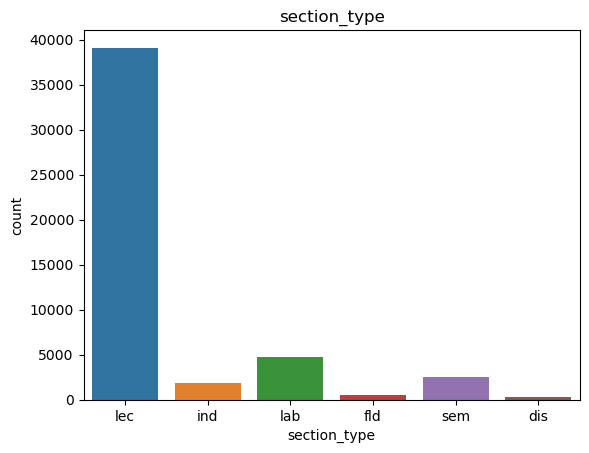

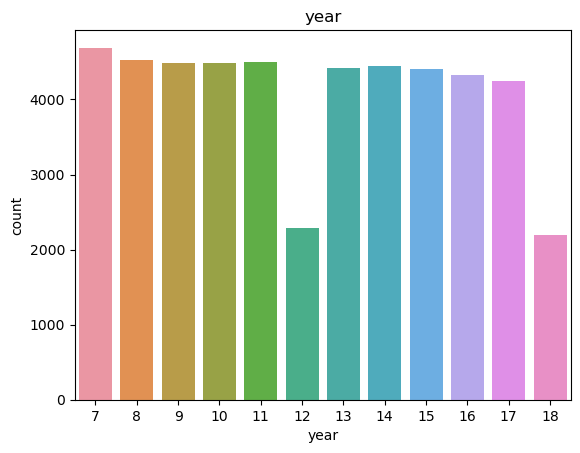

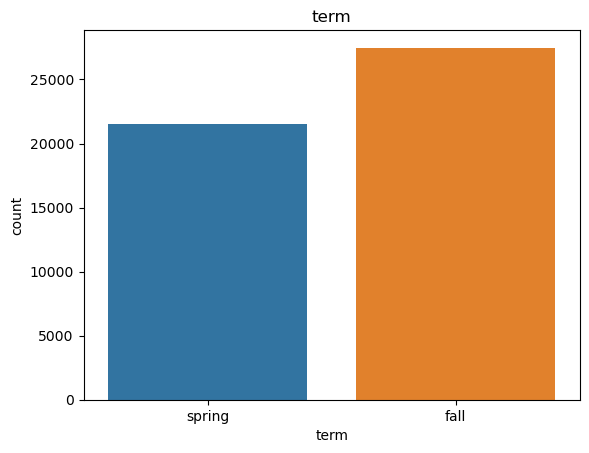

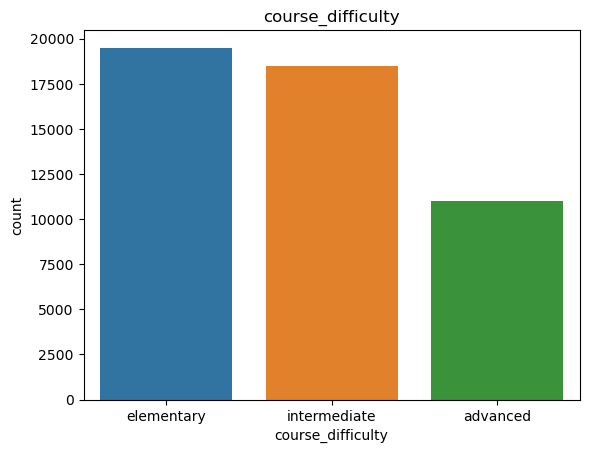

In [11]:
# barplots to explore categorical features except 'instructor_id', 'subject_
# name', 'course_name', and 'facility_code', which have too many distinct
# values to visualize cleanly in a barplot

for col in ['section_type', 'year', 'term', 'course_difficulty']:
  col_name = col
  plot = sns.countplot(data = df, x = col)
  plot.set_title(col_name)
  plt.show()
  print('\n\n')

By far the most common section type is lecture. This is plausible; other section types are more specific and are reserved for non-typical classes. 

I'm not sure why the years 2012 and 2018 seem to have significantly fewer (almost by half) courses in the dataset compared to other years. This would be something to further investigate with the data originator. 

More courses are offered in Fall than in Spring terms in general, so the breakdown by term looks normal. It looks like no Summer term courses are included in the dataset; they would be a very interesting addition. Students often wonder if they should take Summer courses, which are usually shorter in absolute duration, than semester-long classes. 

The distribution of course difficulty looks normal as well. Most courses are at the elementary/introductory level, then fewer students continue on to the intermediate then advanced courses, so there are fewer of those offered. 

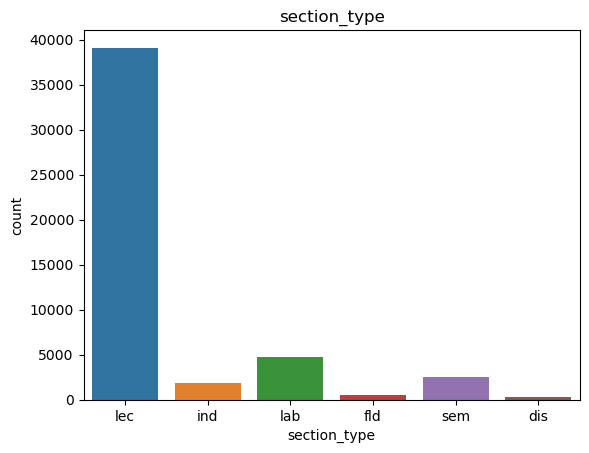

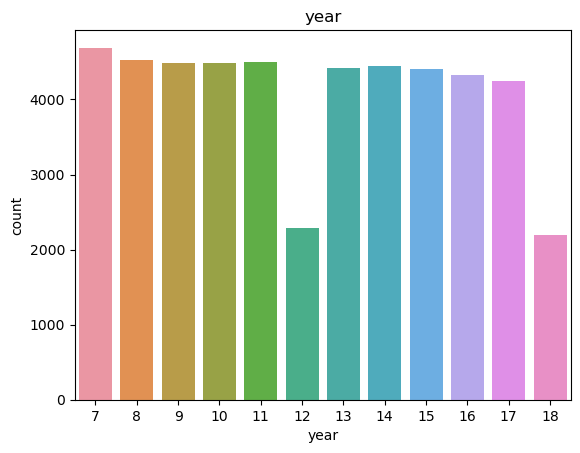

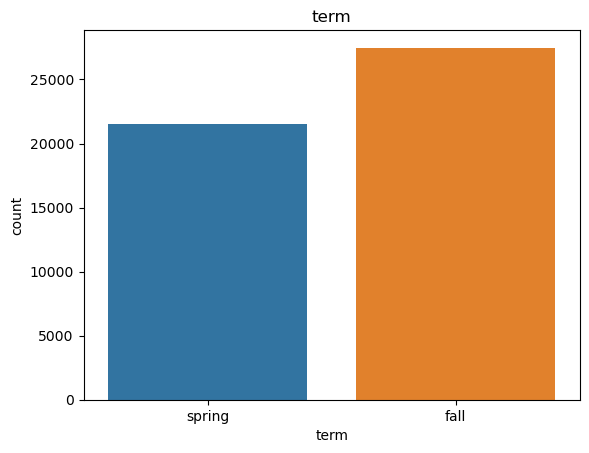

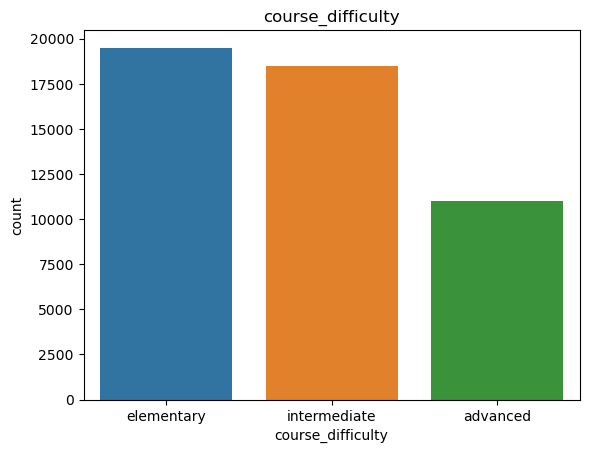

In [12]:
# visualize when courses meet
# count plot with mon-weekend as bars (true values)

for col in ['section_type', 'year', 'term', 'course_difficulty']:
  col_name = col
  plot = sns.countplot(data = df, x = col)
  plot.set_title(col_name)
  plt.show()
  print('\n\n')

In [13]:
# select all days of the week columns
days_cols = ['mon', 'tues', 'wed', 'thurs', 'fri', 'weekend']

# replace values with 1s and 0s
df[days_cols] = df[days_cols].replace({True: 1, False: 0})

# check
df[days_cols].sample(10)

,mon,tues,wed,thurs,fri,weekend
4446,0,0,0,0,0,0
58754,0,0,1,0,0,0
17889,0,1,0,1,0,0
22811,0,1,0,1,0,0
15338,1,0,1,0,1,0
63066,1,1,1,1,0,0
3327,0,0,1,0,0,0
34912,1,0,1,0,1,0
39098,1,0,1,0,0,0
55925,1,1,1,1,0,0


In [14]:
# check
df.dtypes

section_type          object
instructor_id         object
facility_code         object
start_time           float64
mon                    int64
tues                   int64
wed                    int64
thurs                  int64
fri                    int64
subject_name          object
course_name           object
a_proportion         float64
f_proportion         float64
avg_grade            float64
year                   int64
term                  object
class_length         float64
total_time             int64
weekend                int64
course_difficulty     object
dtype: object

In [15]:
# create empty dictionary to track how many courses on which days of week
days_dict = {}

# loop through days list
for col in days_cols:

    # populate days_dict
    days_dict[col] = df[col].sum()

# check
print(days_dict)

{'mon': 22453, 'tues': 21864, 'wed': 21832, 'thurs': 20990, 'fri': 12521, 'weekend': 265}


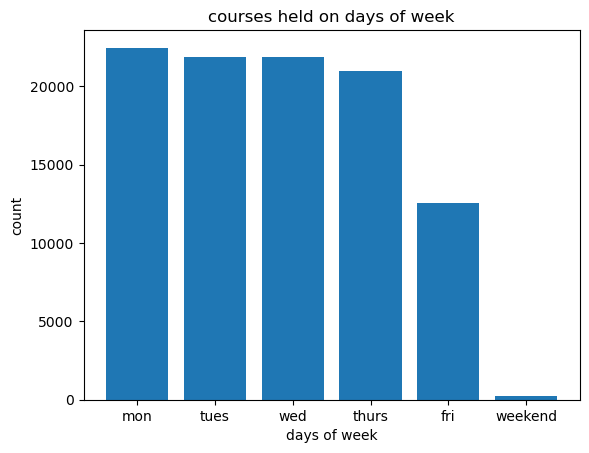

In [16]:
names = list(days_dict.keys())
values = list(days_dict.values())

plt.bar(range(len(days_dict)), values, tick_label=names)
plt.title('courses held on days of week')
plt.ylabel('count')
plt.xlabel('days of week')
plt.show()

Most courses are held from Monday to Thursday. A little more than half of courses held on those days are held on Fridays. Predictably, only a very few number of courses are held on the weekend. 

This plot shows the number of classes held on each day. Many of the classes are held twice or three times per week, so many of the classes held on Mondays are also held on Wednesdays, for example.

### Numeric Features

In [17]:
# good way to visualize 'instructor_id', 'course_name', 'subject_name', 'facility_code'?
# 'facility_code' = map of campus with key for facility_code numbers?
# subject_name = would probably have to group into departments, then could visualize with circle sizes; same with course_name

In [18]:
df.describe(include = 'number')

,start_time,mon,tues,wed,thurs,fri,a_proportion,f_proportion,avg_grade,year,class_length,total_time,weekend
count,49012.000000,49012.000000,49012.000000,49012.000000,49012.000000,49012.000000,49012.000000,49012.000000,49012.000000,49012.000000,49012.000000,49012.000000,49012.000000
mean,676.647494,0.458112,0.446095,0.445442,0.428262,0.255468,0.514208,0.008356,3.514628,12.199502,74.034012,147.119073,0.005407
std,241.312605,0.498247,0.497091,0.497020,0.494832,0.436128,0.293018,0.023905,0.374382,3.400702,48.227477,124.701743,0.073333
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000
25%,570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.264706,0.000000,3.264706,9.000000,50.000000,115.000000,0.000000
50%,660.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.461804,0.000000,3.559322,12.000000,75.000000,150.000000,0.000000
75%,865.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.764706,0.000000,3.833333,15.000000,75.000000,150.000000,0.000000
max,1260.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,18.000000,600.000000,3000.000000,1.000000


In [19]:
# make list of numeric features
numeric_features = ['start_time', 'class_length', 'total_time']

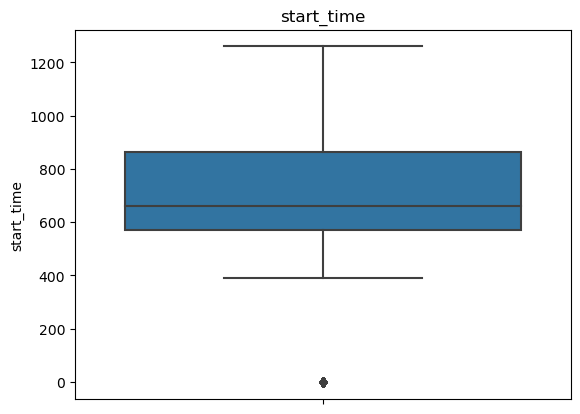

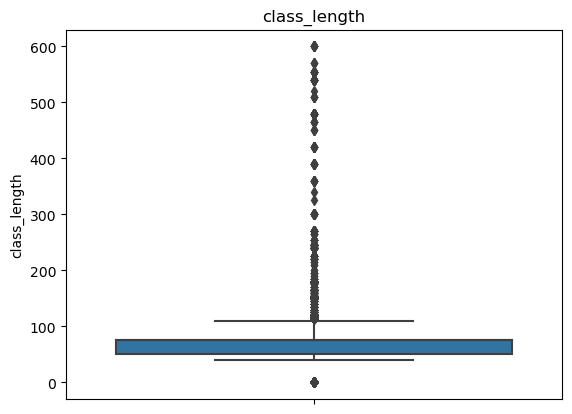

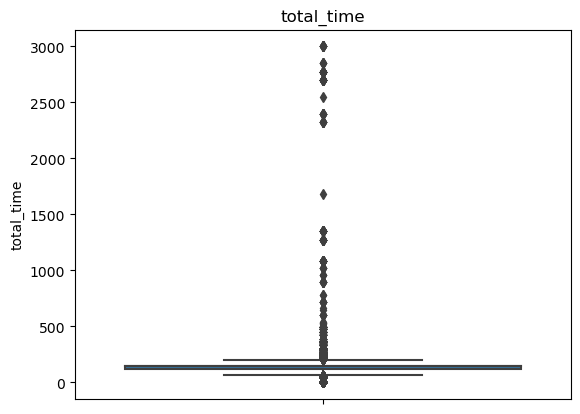

In [20]:
# boxplots for numeric variables to see outliers

for col in numeric_features:
  plot = sns.boxplot(data = df, y = col)
  plot.set_title(col)
  plt.show()
  print('\n\n')

The outliers for 'start_time' that seem to be around 0 are the ones that don't have a start time assigned; they are coded in the original .csv files on Kaggle with the value -1.

Leaving out outliers for 'class_length' and 'total_time', the middle 50% of sections are between 50-75 minutes long and meet for a total of between 115-150 minutes per week. 



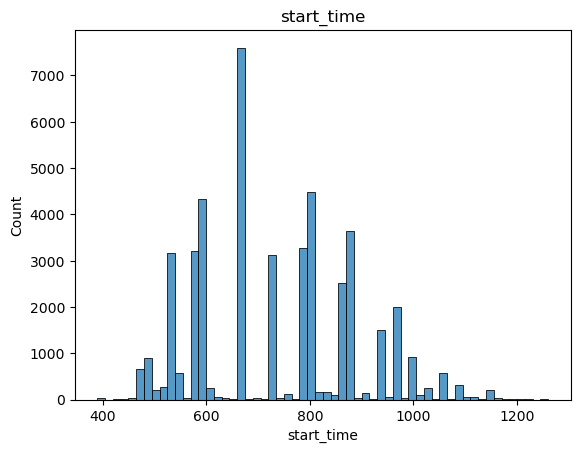

In [21]:
# histogram for start_time without outliers at -1
start_time_no_outliers_df = df[df['start_time'] != -1]

plot = sns.histplot(data = start_time_no_outliers_df, 
                    x = 'start_time',
                    bins = 'auto')
plot.set_title('start_time')
plt.show()

This histogram without outliers for start_time shows a relatively normal distribution centered around around 700 minutes (11 2/3 hours, so around noon). It makes sense that about half of classes start before noon and about half after. 

# Multivariate Visualizations

In [22]:
## Correlation heatmap

# to visualize correlations in a heatmap with categorical variables, they need
# to be converted to numbers; will use get_dummies to convert categorical
# columns to dummy columns that are binary encoded

# make a copy of df
df_corr = df.copy()

In [23]:
df_corr.columns

Index(['section_type', 'instructor_id', 'facility_code', 'start_time', 'mon',
       'tues', 'wed', 'thurs', 'fri', 'subject_name', 'course_name',
       'a_proportion', 'f_proportion', 'avg_grade', 'year', 'term',
       'class_length', 'total_time', 'weekend', 'course_difficulty'],
      dtype='object')

In [24]:
# can binary encode days of week and weekend without using get_dummies
days_cols = ['mon', 'tues', 'wed', 'thurs', 'fri', 'weekend']

for col in days_cols:
  df_corr[col].replace({True: 1, False: 0, 'True': 1, 'False': 0}, 
                       inplace = True)
  # check
  print(df_corr[col].value_counts())

0    26559
1    22453
Name: mon, dtype: int64
0    27148
1    21864
Name: tues, dtype: int64
0    27180
1    21832
Name: wed, dtype: int64
0    28022
1    20990
Name: thurs, dtype: int64
0    36491
1    12521
Name: fri, dtype: int64
0    48747
1      265
Name: weekend, dtype: int64


In [25]:
cat_cols = ['section_type', 'instructor_id', 'facility_code','subject_name', 
            'course_name', 'year', 'term', 'course_difficulty']

for col in cat_cols:

  # use get_dummies to create dummy variables for columns
  # example: dummy_cols = pd.get_dummies(df['col'], prefix = 'category')
  dummy_cols = pd.get_dummies(df_corr[col], prefix = str(col))

  # concatenate the dummy variables with the original df
  # example: df = pd.concat([df, dummy_cols], axis = 1)
  df_corr = pd.concat([df_corr, dummy_cols], axis = 1)

  # drop original categorical variable
  # example: df.drop(columns = 'col', inplace = True)
  df_corr.drop(columns = col, inplace = True)

# check
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49012 entries, 12 to 64185
Columns: 1378 entries, start_time to course_difficulty_intermediate
dtypes: float64(5), int64(7), uint8(1366)
memory usage: 68.7 MB


In [26]:
# make the correlations
corr = df_corr.corr()

In [27]:
# check
corr

,start_time,mon,tues,wed,thurs,fri,a_proportion,f_proportion,avg_grade,class_length,...,year_14,year_15,year_16,year_17,year_18,term_fall,term_spring,course_difficulty_advanced,course_difficulty_elementary,course_difficulty_intermediate
start_time,1.000000,0.158021,0.159183,0.162163,0.147013,0.001553,-0.140318,0.022375,-0.101099,0.426577,...,0.003184,0.000212,-0.001043,-0.000297,-0.002680,0.020453,-0.020453,-0.134619,0.058485,0.056868
mon,0.158021,1.000000,-0.499735,0.771070,-0.465654,0.532388,-0.217519,0.059189,-0.207958,-0.115468,...,-0.007911,-0.012212,-0.012997,-0.017070,-0.009197,0.028300,-0.028300,-0.187294,0.231860,-0.072834
tues,0.159183,-0.499735,1.000000,-0.550931,0.829200,-0.322488,-0.123339,0.011615,-0.098378,0.092673,...,-0.000573,-0.002351,-0.009695,-0.012293,-0.010329,0.012340,-0.012340,-0.079132,0.050282,0.017370
wed,0.162163,0.771070,-0.550931,1.000000,-0.518327,0.464109,-0.168055,0.054870,-0.165456,-0.089760,...,-0.006301,-0.012136,-0.007551,-0.006927,-0.002904,0.019367,-0.019367,-0.160753,0.182533,-0.045882
thurs,0.147013,-0.465654,0.829200,-0.518327,1.000000,-0.308618,-0.148295,0.019003,-0.123148,0.070654,...,-0.000807,-0.000278,-0.010577,-0.014155,-0.016916,0.007909,-0.007909,-0.091602,0.066410,0.011824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
term_fall,0.020453,0.028300,0.012340,0.019367,0.007909,0.028962,-0.038409,0.001864,-0.022418,-0.002830,...,-0.026459,-0.024630,-0.026089,-0.030456,0.191775,1.000000,-1.000000,-0.034414,0.048725,-0.019564
term_spring,-0.020453,-0.028300,-0.012340,-0.019367,-0.007909,-0.028962,0.038409,-0.001864,0.022418,0.002830,...,0.026459,0.024630,0.026089,0.030456,-0.191775,-1.000000,1.000000,0.034414,-0.048725,0.019564
course_difficulty_advanced,-0.134619,-0.187294,-0.079132,-0.160753,-0.091602,-0.133932,0.204297,-0.069988,0.202528,0.071621,...,0.002118,-0.000280,0.003900,0.002816,-0.006320,-0.034414,0.034414,1.000000,-0.437640,-0.419209
course_difficulty_elementary,0.058485,0.231860,0.050282,0.182533,0.066410,0.211775,-0.145207,0.083230,-0.153810,-0.156272,...,-0.008151,-0.010224,-0.019835,-0.015036,0.008248,0.048725,-0.048725,-0.437640,1.000000,-0.632867


In [28]:
# too many columns to visualize in heatmap; will look at coefficients in tables instead
corr_coefficients = corr.unstack().sort_values().drop_duplicates()

print(type(corr_coefficients))

# most strongly correlated variables (negative)
display(corr_coefficients.head())

# most strongly correlated variables (positive)
display(corr_coefficients.tail())

<class 'pandas.core.series.Series'>


term_spring                     term_fall                      -1.000000
section_type_lab                section_type_lec               -0.650262
course_difficulty_intermediate  course_difficulty_elementary   -0.632867
section_type_ind                start_time                     -0.554149
wed                             tues                           -0.550931
dtype: float64

instructor_id_309711.0                                              course_name_nutrition today                                0.984941
course_name_workshop in educational leadership and policy analysis  subject_name_educational leadership and policy analysis    0.985174
instructor_id_464620.0                                              course_name_business law                                   0.986384
facility_code_0129                                                  subject_name_naval science                                 0.995814
course_difficulty_elementary                                        course_difficulty_elementary                               1.000000
dtype: float64

In [29]:
corr_df = corr_coefficients.to_frame()
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 527506 entries, ('term_spring', 'term_fall') to ('course_difficulty_elementary', 'course_difficulty_elementary')
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       527506 non-null  float64
dtypes: float64(1)
memory usage: 6.1+ MB


In [30]:
corr_df.head()

,,0
term_spring,term_fall,-1.000000
section_type_lab,section_type_lec,-0.650262
course_difficulty_intermediate,course_difficulty_elementary,-0.632867
section_type_ind,start_time,-0.554149
wed,tues,-0.550931


In [31]:
corr_df.rename(columns = {0: 'coeff'}, inplace = True)

In [32]:
# positive strong correlations
strong_pos = corr_df[corr_df['coeff'] >= .7]

with pd.option_context('display.max_rows', None):
    print(strong_pos)

                                                                                                          coeff
course_name_nuclear reactor laboratory             instructor_id_599888.0                              0.700496
course_name_elementary latin                       subject_name_latin (classics)                       0.700620
subject_name_community and environmental sociology instructor_id_2601467.0                             0.701736
course_name_human resources development: educat... subject_name_counseling psychology                  0.704337
subject_name_biological systems engineering        facility_code_0080                                  0.705713
course_name_bank management                        instructor_id_747510.0                              0.707842
instructor_id_190420.0                             course_name_issues in psychology                    0.709151
course_name_introduction to scientific communic... instructor_id_280437.0                              0

In [33]:
# positive moderate correlations
mod_pos = corr_df[ (corr_df['coeff'] >= .5) & (corr_df['coeff'] < .7) ]

with pd.option_context('display.max_rows', None):
    print(mod_pos)

                                                                                                          coeff
instructor_id_4197612.0                            course_name_transitions: practice, professional...  0.500293
course_name_introduction to statistical methods    facility_code_0451a                                 0.501300
instructor_id_1600979.0                            course_name_survey of early hispanic literature     0.502305
facility_code_0557                                 course_name_crc first-year seminar: foundations...  0.502439
subject_name_physical therapy                      course_name_physical therapy educcation and lif...  0.502532
instructor_id_590681.0                             course_name_human resources development: career...  0.502685
course_name_second semester hebrew                 instructor_id_1062990.0                             0.503713
instructor_id_3370746.0                            subject_name_occupational therapy (department o...  0

In [34]:
# positive low correlations
low_pos = corr_df[ (corr_df['coeff'] >= .3) & (corr_df['coeff'] < .5) ]

with pd.option_context('display.max_rows', None):
    print(low_pos)

                                                                                                          coeff
subject_name_mechanical engineering                course_name_engineering design projects             0.300193
facility_code_0028                                 instructor_id_716313.0                              0.300207
instructor_id_2601788.0                            facility_code_0118                                  0.301437
facility_code_0450                                 course_name_physical therapy educcation and lif...  0.301460
instructor_id_4942976.0                            course_name_managing organizations                  0.301866
subject_name_curriculum and instruction            course_name_general seminar                         0.301946
course_name_special topics in mass communication   instructor_id_2601747.0                             0.302277
facility_code_1480                                 instructor_id_585086.0                              0

In [35]:
# negative low to strong correlations
neg = corr_df[corr_df['coeff'] <= -.3]

with pd.option_context('display.max_rows', None):
    print(neg)

                                                                coeff
term_spring                    term_fall                    -1.000000
section_type_lab               section_type_lec             -0.650262
course_difficulty_intermediate course_difficulty_elementary -0.632867
section_type_ind               start_time                   -0.554149
wed                            tues                         -0.550931
                               thurs                        -0.518327
tues                           mon                          -0.499735
section_type_sem               section_type_lec             -0.466160
thurs                          mon                          -0.465654
avg_grade                      f_proportion                 -0.459244
course_difficulty_elementary   course_difficulty_advanced   -0.437640
course_difficulty_intermediate course_difficulty_advanced   -0.419209
section_type_ind               section_type_lec             -0.392251
section_type_lec    

In [36]:
## Multivariate exploratory visualizations

# not histograms, boxplots, or correlation plots

df.columns

Index(['section_type', 'instructor_id', 'facility_code', 'start_time', 'mon',
       'tues', 'wed', 'thurs', 'fri', 'subject_name', 'course_name',
       'a_proportion', 'f_proportion', 'avg_grade', 'year', 'term',
       'class_length', 'total_time', 'weekend', 'course_difficulty'],
      dtype='object')

In [37]:
# further cleaning:
# make days of the week variables into one categorical column with values 
# like MW, TR, MWF, etc.
# get back number of students (= grades) per class
# combine course and subject names into departments

## Subjects and Grades

Do students earn higher grades in certain subjects? There is the conception in higher ed that some subjects, say Communications, are easier than others, say Chemistry. Let's see if this dataset can shed any light on this notion.

In [104]:
# make note that not all subjects have their own majors or vice versa; this 
# list of subjects is not a guide to available majors

# to fix this a bit, i can go through each course's course_difficulty and make
# sure that if the subject doesn't have courses at all difficulty levels,
# they do not get included in this plot; this would act as a proxy for 
# actual majors (because actual majors must have courses at all levels,
# whereas some subjects only have, say, upper-level courses, and therefore
# are not in themselves majors)

# only going to include subjects with courses at all difficulty levels
# (assuming that a major has courses at all levels)

# get list of subject names
subj_list = df['subject_name'].unique()

# initiate empty list to save subjects with courses in all difficulty levels
all_diff_subj_list = []

# for each subject
for subj in subj_list:
    
    # create filtered df for every subject
    filtered_df = df[df['subject_name'] == subj]
    
    # get list of all course difficulties
    difficulties_list = filtered_df['course_difficulty'].unique()
    
    # if each course difficulty is in the list, pass subject to new list
    if all(x in difficulties_list for x in ['elementary', 
                                            'intermediate', 
                                            'advanced']):
        
        # append to new list
        all_diff_subj_list.append(subj)

# check
print(len(all_diff_subj_list))

102


In [113]:
# make filtered df with only subjects on all_diff_subj_list
all_diff_subj_df = df[df['subject_name'].isin(all_diff_subj_list)]

# check
all_diff_subj_df['subject_name'].nunique()

102

In [115]:
# subject groups by averages
# only subjects with courses in all difficulty levels
subject_groups_avg = all_diff_subj_df.groupby('subject_name', 
                                              as_index = False
                                              ).mean(numeric_only = True)[[
                                                             'subject_name',
                                                             'a_proportion', 
                                                             'f_proportion', 
                                                             'avg_grade']]
# check
len(subject_groups_avg)

102

In [119]:
# to include the proportion of As and Fs, AND the average grade on a 4.0
# scale in the same plot, scale avg_grade column to between 0-1

# see max avg_grade
subject_groups_avg['avg_grade'].max()

# scale down
subject_groups_avg['avg_grade'] = subject_groups_avg['avg_grade'] / 4

In [120]:
# check
subject_groups_avg['avg_grade'].max()

0.9782730801728297

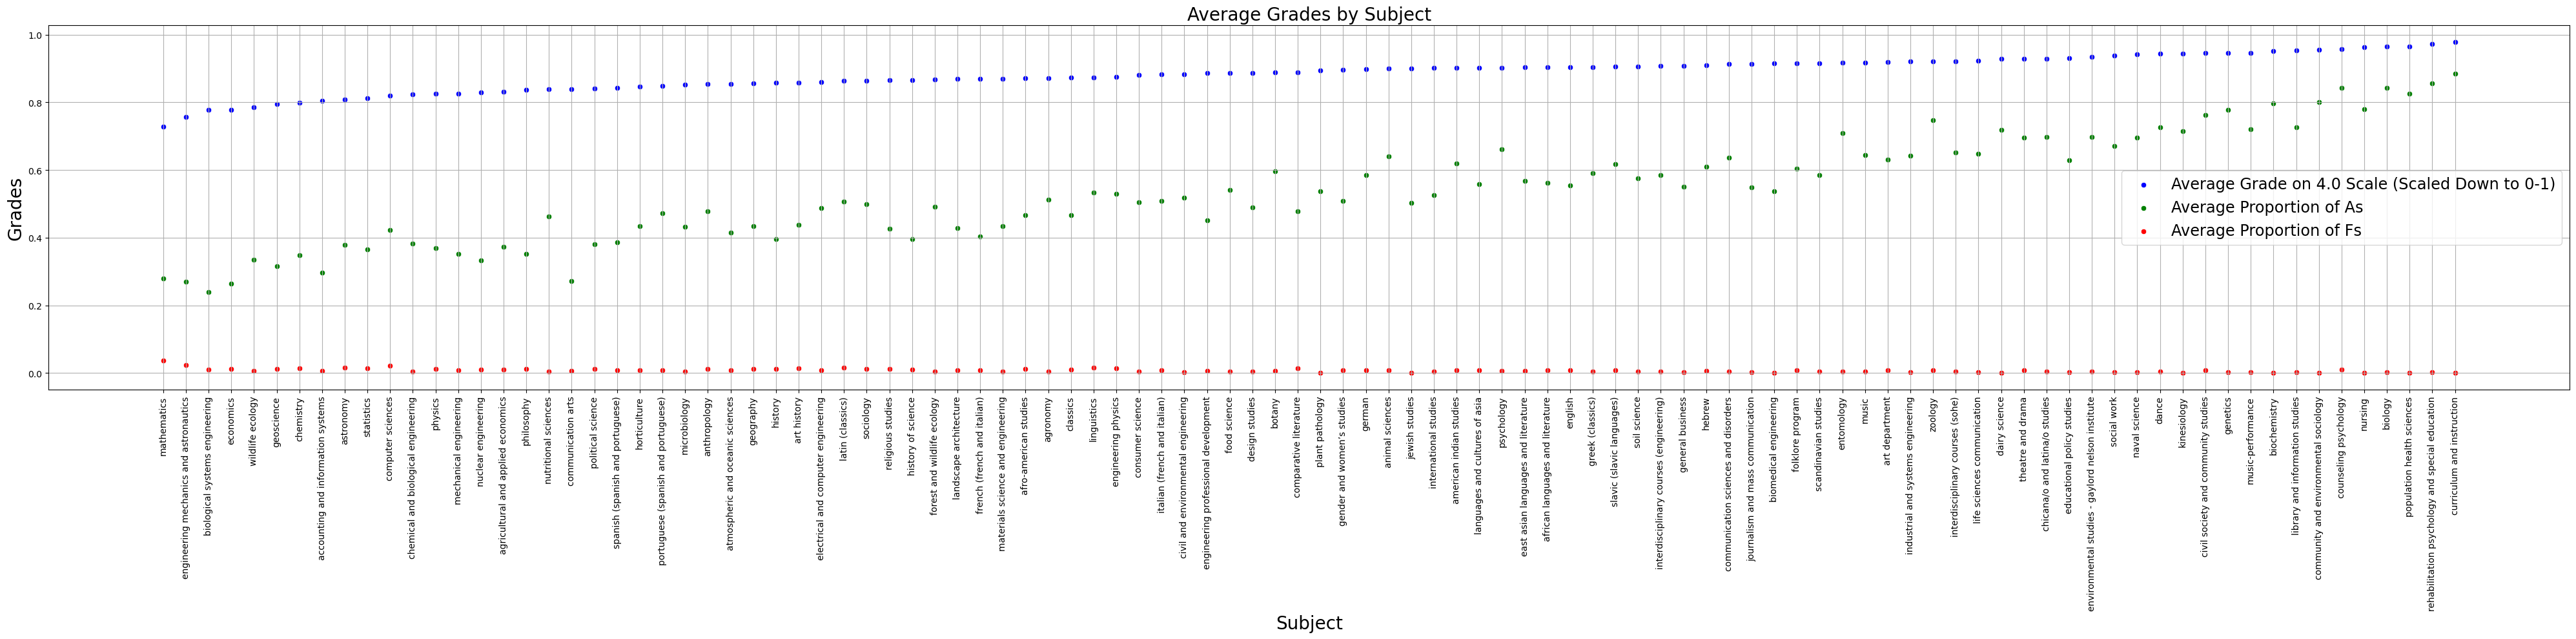

In [122]:
# make plot
fig, ax = plt.subplots(figsize = (40, 10))

# labels
ax.set_title('Average Grades by Subject', fontsize = 20) 
ax.set_ylabel('Grades', fontsize = 20) 
ax.set_xlabel('Subject', fontsize = 20)

# avg_grade
sns.scatterplot(data = subject_groups_avg.sort_values(by = 'avg_grade'), 
               x = 'subject_name', 
               y = 'avg_grade',
               ax = ax,
               c = 'blue',
               label = 'Average Grade on 4.0 Scale (Scaled Down to 0-1)')

# a_proportion
sns.scatterplot(data = subject_groups_avg,
               x = 'subject_name',
               y = 'a_proportion',
               ax = ax,
               c = 'green',
               label = 'Average Proportion of As')

# f_proportion
sns.scatterplot(data = subject_groups_avg,
               x = 'subject_name',
               y = 'f_proportion',
               ax = ax,
               c = 'red',
               label = 'Average Proportion of Fs')

# sprucing up
plt.xticks(rotation = 'vertical')
ax.yaxis.grid(True, which = 'major')
ax.xaxis.grid(True, which = 'major')

# legend
plt.legend(loc = 'center right', fontsize = 'xx-large')

# display
plt.tight_layout()
plt.show()

In [ ]:
# subject groups by medians
subject_groups_med = df.groupby('subject_name', 
                            as_index = False, 
                            numeric_only = True).median()
subject_groups_med

In [ ]:
# aggregate for each subject the average grade (or std, median) and plot 
# against the number of classes in that subject


## Teachers and Grades

In [ ]:
# do same with instructors (top 100 or 50) on x: number of classes they 
# teach, y axis avg grade or std dev of grades or med grade